## Combined ETFs and Housing Data

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iyr_data = Path("IYR.csv")
iyr_df = pd.read_csv(iyr_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

dia_data = Path("DIA.csv")
dia_df = pd.read_csv(dia_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

vno_data = Path("VNO.csv")
vno_df = pd.read_csv(vno_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_data = Path("SPY.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-01-02,250.179993
2019-01-03,244.210007
2019-01-04,252.389999
2019-01-07,254.380005
2019-01-08,256.769989


#### Pivot Table

In [3]:
combined_df = pd.concat([iyr_df, dia_df, vno_df, sp500_df], axis="columns", join="inner")
combined_df.sort_index()
combined_df.columns = ["IYR", "DIA", "VNO", "S&P 500"]
combined_df.head()

,IYR,DIA,VNO,S&P 500
Date,,,,
2019-01-02,73.320000,233.360001,60.360001,250.179993
2019-01-03,73.790001,226.720001,60.200001,244.210007
2019-01-04,74.580002,234.279999,61.209999,252.389999
2019-01-07,75.330002,235.360001,62.380001,254.380005
2019-01-08,76.699997,237.919998,64.019997,256.769989


#### Daily returns of ETFs

In [4]:
daily_returns = combined_df.pct_change()
daily_returns.dropna(inplace=True)
daily_returns.head()

,IYR,DIA,VNO,S&P 500
Date,,,,
2019-01-03,0.006410,-0.028454,-0.002651,-0.023863
2019-01-04,0.010706,0.033345,0.016777,0.033496
2019-01-07,0.010056,0.004610,0.019115,0.007885
2019-01-08,0.018187,0.010877,0.026290,0.009395
2019-01-09,-0.001304,0.004203,0.001406,0.004673


#### Monthly Returns of ETFs

In [5]:
monthly_returns = daily_returns.groupby(pd.Grouper(freq='M')).sum()
monthly_returns.head()

,IYR,DIA,VNO,S&P 500
Date,,,,
2019-01-31,0.131216,0.070911,0.148460,0.077438
2019-02-28,0.007527,0.036302,-0.037192,0.032163
2019-03-31,0.034181,-0.000153,0.002728,0.014090
2019-04-30,0.000262,0.025612,0.026186,0.040229
2019-05-31,-0.000877,-0.067386,-0.042293,-0.064901


In [6]:
new_monthly_returns = monthly_returns.iloc[1:,]
new_monthly_returns.head()

,IYR,DIA,VNO,S&P 500
Date,,,,
2019-02-28,0.007527,0.036302,-0.037192,0.032163
2019-03-31,0.034181,-0.000153,0.002728,0.014090
2019-04-30,0.000262,0.025612,0.026186,0.040229
2019-05-31,-0.000877,-0.067386,-0.042293,-0.064901
2019-06-30,0.005771,0.069133,-0.031343,0.062976


#### US Housing Data

In [7]:
zillow_url = "https://files.zillowstatic.com/research/public_v2/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"

file_path = zillow_url
inventory = pd.read_csv(file_path)
df_inventory_filter = [column for column in inventory if column.startswith (("RegionName", "2020", "2019"))]
df_inventory_2020_NY = inventory[df_inventory_filter]
df_state_filter = [column for column in inventory if column.startswith (("RegionName", "2020", "2019"))]
df_state_filtered = inventory[df_inventory_filter]
df_state = df_state_filtered.reset_index().set_index("RegionName").T.iloc[1:,:].groupby(level = 0, axis = 1).mean()
df_state_round = round(df_state,2)
df_state_round.index.rename("Date",inplace = True)
df_US = pd.DataFrame(df_state_round["United States"])
df_change = df_US.pct_change()
df_change.dropna(inplace=True)
df_change.head()

,United States
Date,
2019-02-28,0.003322
2019-03-31,0.002896
2019-04-30,0.002787
2019-05-31,0.003671
2019-06-30,0.004189


#### New pivot table where the columns are the closing prices

In [8]:
combined_df = pd.concat([new_monthly_returns,df_change], axis="columns", join="inner")
combined_df.head()

,IYR,DIA,VNO,S&P 500,United States
Date,,,,,
2019-02-28,0.007527,0.036302,-0.037192,0.032163,0.003322
2019-03-31,0.034181,-0.000153,0.002728,0.014090,0.002896
2019-04-30,0.000262,0.025612,0.026186,0.040229,0.002787
2019-05-31,-0.000877,-0.067386,-0.042293,-0.064901,0.003671
2019-06-30,0.005771,0.069133,-0.031343,0.062976,0.004189


#### Plot of Real Estate ETFs and US Housing Data

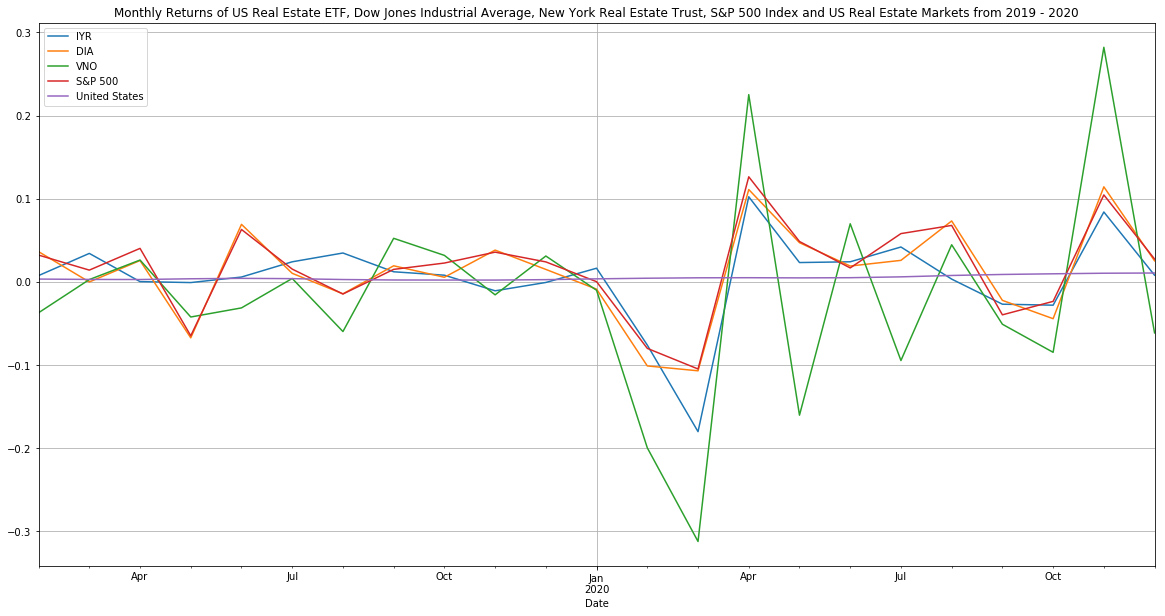

In [9]:
combined_df.plot(figsize=(20,10),title='Monthly Returns of US Real Estate ETF, Dow Jones Industrial Average, New York Real Estate Trust, S&P 500 Index and US Real Estate Markets from 2019 - 2020');
plt.grid()

#### Percent Change

In [10]:
iyr_pct_change = combined_df['IYR'].pct_change()
dia_pct_change = combined_df['DIA'].pct_change()
vno_pct_change = combined_df['VNO'].pct_change()
sp_pct_change = combined_df['S&P 500'].pct_change()
us_pct_change = combined_df['United States'].pct_change()

#### Beta Calculation and Plot

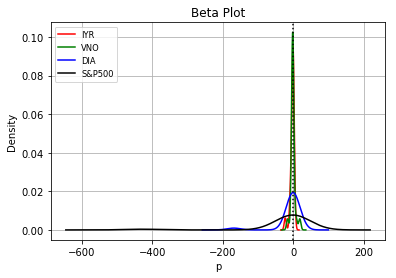

In [11]:
iyr_pct_change.plot.kde(color='red', label='IYR');
vno_pct_change.plot.kde(color='green', label='VNO');
dia_pct_change.plot.kde(color='blue', label='DIA');
sp_pct_change.plot.kde(color='black', label='S&P500');
#us_pct_change.plot.kde(color='yellow', label='United States')
plt.title('Beta Plot');
plt.legend(loc='upper left', fontsize='small');
plt.grid(True, which='both');
plt.axvline(x=0, color='black', linestyle=':');
plt.xlabel('p');

#### Covariance of all returns

In [12]:
iyr_covariance = combined_df['IYR'].cov(combined_df['S&P 500'])
dia_covariance = combined_df['DIA'].cov(combined_df['S&P 500'])
vno_covariance = combined_df['VNO'].cov(combined_df['S&P 500'])
us_covariance = combined_df['United States'].cov(combined_df['S&P 500'])

print(f"DIA Covariance with S&P 500: {round(dia_covariance,4)}")
print(f"IYR Covariance with S&P 500: {round(iyr_covariance,4)}")
print(f"VNO Covariance with S&P 500: {round(vno_covariance,4)}")
print(f"US Housing Covariance with S&P 500: {round(us_covariance,4)}")

DIA Covariance with S&P 500: 0.003
IYR Covariance with S&P 500: 0.0024
VNO Covariance with S&P 500: 0.005
US Housing Covariance with S&P 500: 0.0


#### Variance of all returns

In [13]:
variance = combined_df['S&P 500'].var()
variance

0.002972580306330595

#### Beta of all returns

In [14]:

iyr_beta = iyr_covariance / variance
dia_beta = dia_covariance / variance
vno_beta = vno_covariance / variance
us_beta = us_covariance / variance

print(f"IYR: {iyr_beta} | DIA: {dia_beta} | VNO: {vno_beta} | United States: {us_beta}")

IYR: 0.7950906150198013 | DIA: 1.0073642687771553 | VNO: 1.6772751105579158 | United States: 0.005789197213759994


#### 2 year rolling covariance of IYR, DIA, VNO and US Housing Data vs. S&P 500 and plot

In [15]:
rolling_iyr_covariance = combined_df['IYR'].rolling(window=3).cov(combined_df['S&P 500'])
rolling_dia_covariance = combined_df['DIA'].rolling(window=3).cov(combined_df['S&P 500'])
rolling_vno_covariance = combined_df['VNO'].rolling(window=3).cov(combined_df['S&P 500'])
rolling_us_covariance = combined_df['United States'].rolling(window=3).cov(combined_df['S&P 500'])

# 2 year rolling variance of S&P 500
rolling_variance = combined_df['S&P 500'].rolling(window=3).var()

# 2 year rolling betas
rolling_iyr_beta = rolling_iyr_covariance / rolling_variance
rolling_dia_beta = rolling_dia_covariance / rolling_variance
rolling_vno_beta = rolling_vno_covariance / rolling_variance
rolling_us_beta = rolling_us_covariance / rolling_variance
rolling_us_beta

Date
2019-02-28         NaN
2019-03-31         NaN
2019-04-30    0.000507
2019-05-31   -0.008736
2019-06-30    0.000186
2019-07-31    0.003833
2019-08-31    0.017278
2019-09-30    0.009014
2019-10-31   -0.017307
2019-11-30   -0.004634
2019-12-31   -0.018073
2020-01-31   -0.041255
2020-02-29   -0.014620
2020-03-31   -0.011346
2020-04-30    0.001417
2020-05-31    0.000286
2020-06-30    0.000396
2020-07-31    0.016892
2020-08-31    0.044463
2020-09-30   -0.018664
2020-10-31   -0.014914
2020-11-30    0.008382
2020-12-31    0.004678
Freq: M, dtype: float64

#### Plot of the different datasets as multiple trends on the same figure

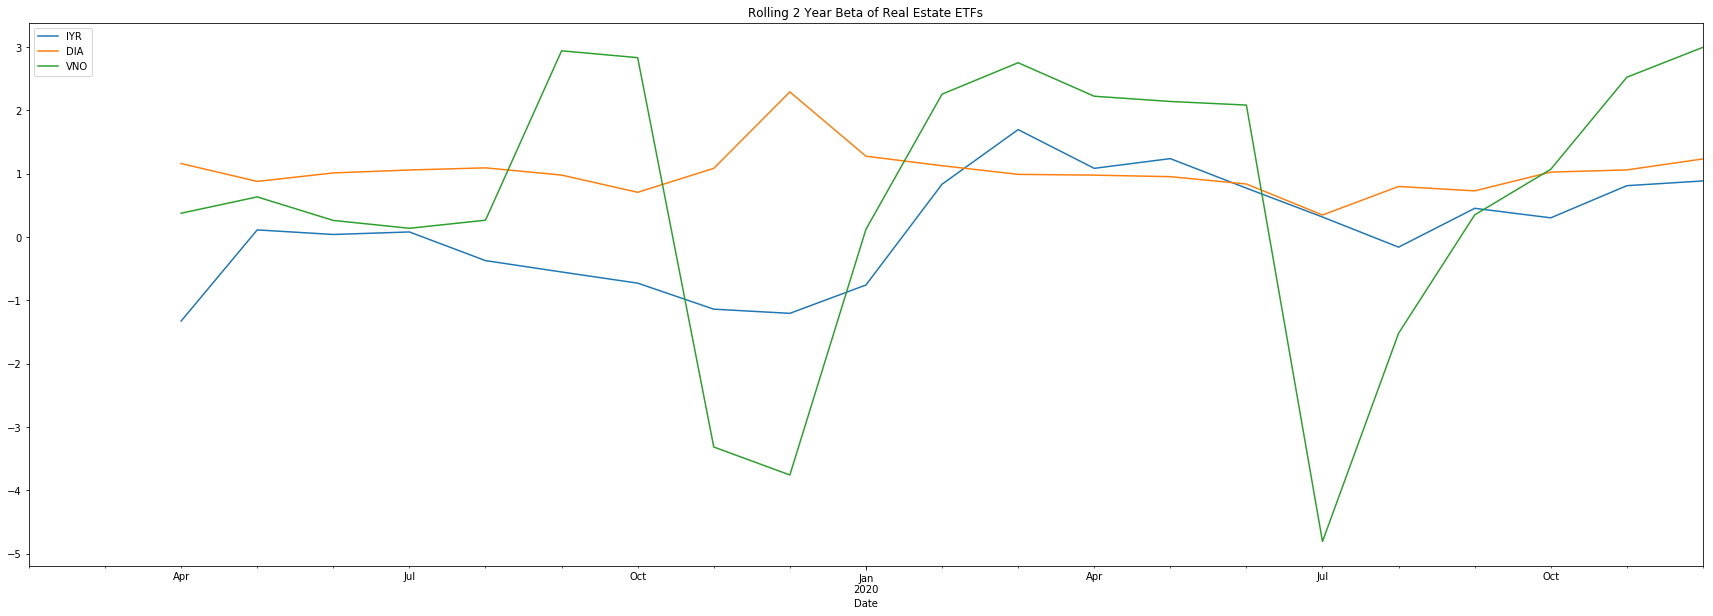

In [16]:
ax = rolling_iyr_beta.plot(figsize=(30, 10), title='Rolling 2 Year Beta of Real Estate ETFs')
rolling_dia_beta.plot(ax=ax)
rolling_vno_beta.plot(ax=ax)

ax.legend(["IYR", "DIA", "VNO"]);

#### Rolling standard deviation

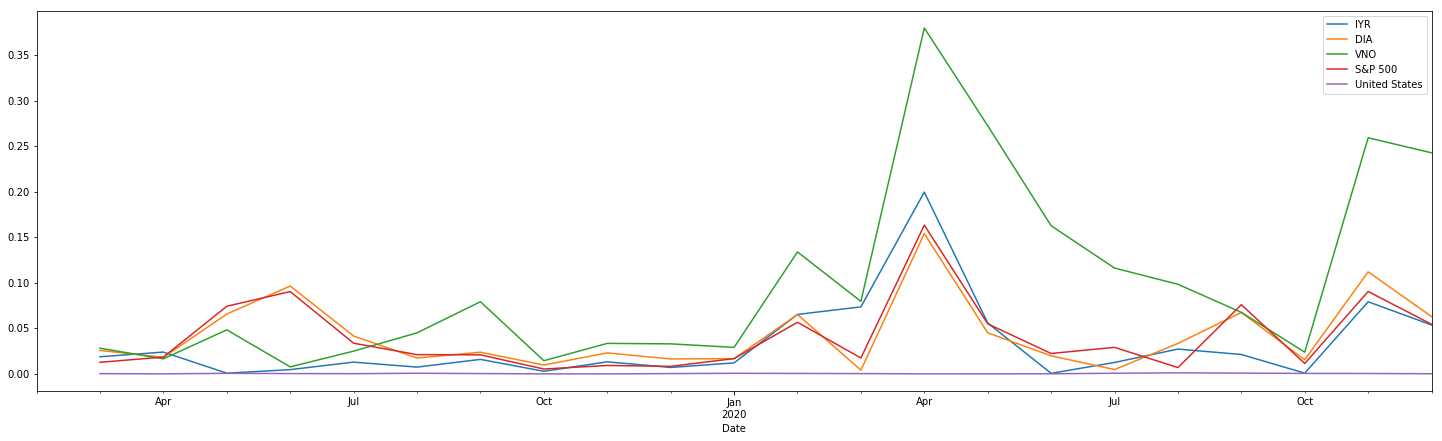

In [17]:
rolling_std = combined_df.rolling(2).std()
rolling_std.head()
rolling_std.plot(figsize = (25,7));

#### Annualized Sharpe Ratios

In [18]:
sharpe_ratios_2 = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios_2

IYR               1.364707
DIA               3.310356
VNO              -2.203466
S&P 500           4.860857
United States    29.175521
dtype: float64